In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint


# Import API key
from api_keys import weather_api_key
api_f = "&appid="
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&q="

In [43]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count


In [49]:
record_num = 1
record_set = 1
weather_data_df = { "city": [],
                    "date": [],
                    "cloudiness":[],
                    "humidity":[],
                    "lat": [],
                    "lng": [],
                    "maxtemp": [],
                    "windspeed":[],
                               }
for city in cities:
    n_url = url + city + api_f + weather_api_key
    response = requests.get(n_url).json()
    try:
        print(f'Processing Weather Data for Record {record_num} of Set {record_set} | {response["name"]}')
        weather_data_df['city'].append(response['name'])        
        weather_data_df['cloudiness'].append(response['clouds']['all'])
        weather_data_df['date'].append(response['dt'])
        weather_data_df['humidity'].append(response['main']['humidity'])
        weather_data_df['lat'].append(response['coord']['lat'])
        weather_data_df['lng'].append(response['coord']['lon'])
        weather_data_df['maxtemp'].append(response['main']['temp_max'])
        weather_data_df['windspeed'].append(response['wind']['speed'])
        record_num += 1
    except(KeyError, IndexError):
        print("City not found....Skipping............")
    
    #If statement to handle the API call limits
    if record_num == 51:
        record_set += 1
        record_num = 1
        time.sleep(60)
    print(record_num)
print(('''
-----------------------------
Data Retrival Complete
-----------------------------'''))

Processing Weather Data for Record 1 of Set 1 | Cedar City
2
Processing Weather Data for Record 2 of Set 1 | Rocha
3
Processing Weather Data for Record 3 of Set 1 | Labuhan
4
Processing Weather Data for Record 4 of Set 1 | San Ramon
5
City not found....Skipping............
5
Processing Weather Data for Record 5 of Set 1 | Bluff
6
Processing Weather Data for Record 6 of Set 1 | Mataura
7
Processing Weather Data for Record 7 of Set 1 | Ushuaia
8
City not found....Skipping............
8
Processing Weather Data for Record 8 of Set 1 | Brigg
9
Processing Weather Data for Record 9 of Set 1 | Rikitea
10
Processing Weather Data for Record 10 of Set 1 | Paita
11
Processing Weather Data for Record 11 of Set 1 | Ukiah
12
Processing Weather Data for Record 12 of Set 1 | Saint Anthony
13
Processing Weather Data for Record 13 of Set 1 | Sabang
14
Processing Weather Data for Record 14 of Set 1 | Bambous Virieux
15
City not found....Skipping............
15
Processing Weather Data for Record 15 of Set 

Processing Weather Data for Record 25 of Set 3 | Kirakira
26
Processing Weather Data for Record 26 of Set 3 | Zhuhai
27
Processing Weather Data for Record 27 of Set 3 | Yiyang
28
Processing Weather Data for Record 28 of Set 3 | Machalí
29
Processing Weather Data for Record 29 of Set 3 | Alofi
30
Processing Weather Data for Record 30 of Set 3 | Kavieng
31
Processing Weather Data for Record 31 of Set 3 | Avarua
32
Processing Weather Data for Record 32 of Set 3 | Cayenne
33
Processing Weather Data for Record 33 of Set 3 | Bay Roberts
34
Processing Weather Data for Record 34 of Set 3 | Lüderitz
35
Processing Weather Data for Record 35 of Set 3 | Dulce Nombre de Culmí
36
Processing Weather Data for Record 36 of Set 3 | Eyl
37
Processing Weather Data for Record 37 of Set 3 | Ulaangom
38
Processing Weather Data for Record 38 of Set 3 | Sitka
39
Processing Weather Data for Record 39 of Set 3 | Chifeng
40
Processing Weather Data for Record 40 of Set 3 | Bandarbeyla
41
Processing Weather Data fo

Processing Weather Data for Record 2 of Set 6 | Beloha
3
Processing Weather Data for Record 3 of Set 6 | Aklavik
4
Processing Weather Data for Record 4 of Set 6 | Isangel
5
Processing Weather Data for Record 5 of Set 6 | Chinsali
6
Processing Weather Data for Record 6 of Set 6 | Harper
7
Processing Weather Data for Record 7 of Set 6 | Salinas
8
Processing Weather Data for Record 8 of Set 6 | Margate
9
Processing Weather Data for Record 9 of Set 6 | Port Hardy
10
City not found....Skipping............
10
Processing Weather Data for Record 10 of Set 6 | Rivera
11
Processing Weather Data for Record 11 of Set 6 | Urcos
12
Processing Weather Data for Record 12 of Set 6 | Miami
13
Processing Weather Data for Record 13 of Set 6 | Sainte-Thècle
14
Processing Weather Data for Record 14 of Set 6 | Touros
15
Processing Weather Data for Record 15 of Set 6 | Loikaw
16
Processing Weather Data for Record 16 of Set 6 | Mandalgovi
17
City not found....Skipping............
17
Processing Weather Data for

Processing Weather Data for Record 29 of Set 8 | Ciudad Bolivar
30
City not found....Skipping............
30
Processing Weather Data for Record 30 of Set 8 | Ranau
31
Processing Weather Data for Record 31 of Set 8 | Sobolevo
32
Processing Weather Data for Record 32 of Set 8 | Zomba
33
Processing Weather Data for Record 33 of Set 8 | Tautira
34
Processing Weather Data for Record 34 of Set 8 | Vizinga
35
Processing Weather Data for Record 35 of Set 8 | Belaya Gora
36
Processing Weather Data for Record 36 of Set 8 | Devils Lake
37
Processing Weather Data for Record 37 of Set 8 | Jerantut
38
Processing Weather Data for Record 38 of Set 8 | Malakal
39
Processing Weather Data for Record 39 of Set 8 | Coyhaique
40
Processing Weather Data for Record 40 of Set 8 | Oudtshoorn
41
City not found....Skipping............
41
Processing Weather Data for Record 41 of Set 8 | Hue
42
Processing Weather Data for Record 42 of Set 8 | Saldanha
43
Processing Weather Data for Record 43 of Set 8 | Hammerfest
4

KeyboardInterrupt: 

In [45]:
pprint(response)

{'base': 'stations',
 'clouds': {'all': 65},
 'cod': 200,
 'coord': {'lat': 8.34, 'lon': 17.77},
 'dt': 1589059277,
 'id': 2427697,
 'main': {'feels_like': 83.37,
          'grnd_level': 968,
          'humidity': 76,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 78.96,
          'temp_max': 78.96,
          'temp_min': 78.96},
 'name': 'Moïssala',
 'sys': {'country': 'TD', 'sunrise': 1588998676, 'sunset': 1589043568},
 'timezone': 3600,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 196, 'speed': 6.4}}


In [56]:
weather_df

,city,date,cloudiness,humidity,lat,lng,maxtemp,windspeed
0,Cedar City,1589059948,1,11,37.68,-113.06,75.20,9.71
1,Rocha,1589060310,46,79,-34.48,-54.33,53.64,7.38
2,Labuhan,1589060310,95,89,-6.88,112.21,75.92,7.99
3,San Ramon,1589060310,1,28,37.78,-121.98,86.00,8.05
4,Bluff,1589060311,60,74,-46.60,168.33,53.53,10.29
...,...,...,...,...,...,...,...,...
495,Chipinge,1589060969,33,96,-20.19,32.62,53.80,4.09
496,Sarāi Mīr,1589060969,0,25,26.02,82.92,84.49,6.78
497,Virginia Beach,1589060503,75,35,36.85,-75.98,59.00,8.05
498,Solano,1589060970,1,28,38.23,-121.95,87.80,14.99


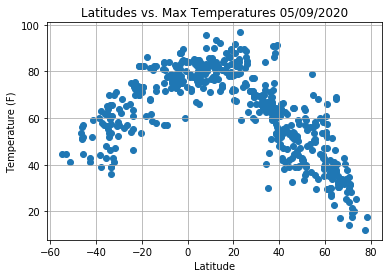

In [65]:
plt.scatter(weather_df["lat"], weather_df["maxtemp"], marker="o")
plt.title(f'Latitudes vs. Max Temperatures {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitudes vs. Max Temperatures.png")

# Show plot
plt.show()

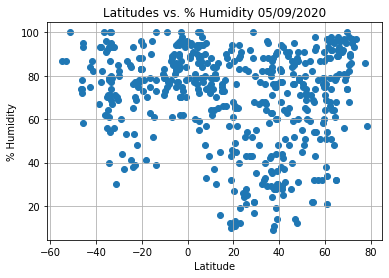

In [66]:
plt.scatter(weather_df["lat"], weather_df["humidity"], marker="o")
plt.title(f'Latitudes vs. % Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("% Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitudes vs. % Humidity.png")

# Show plot
plt.show()

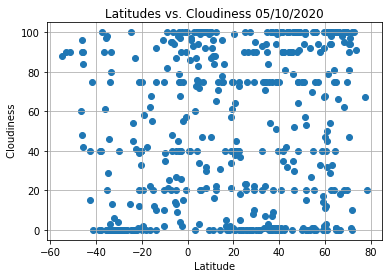

In [67]:
plt.scatter(weather_df["lat"], weather_df["cloudiness"], marker="o")
plt.title(f'Latitudes vs. Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel(" Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitudes vs. Cloudiness.png")

# Show plot
plt.show()

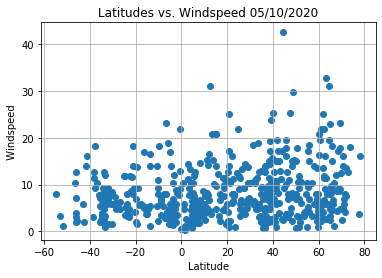

In [68]:
plt.scatter(weather_df["lat"], weather_df["windspeed"], marker="o")
plt.title(f'Latitudes vs. Windspeed {time.strftime("%m/%d/%Y")}')
plt.ylabel(" Windspeed ")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitudes vs. Windspeed.png")

# Show plot
plt.show()

In [88]:
northern_df = weather_df.loc[(weather_df["lat"]) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["lat"]).astype(float) < 0, :]

Linear Regression Equation: y = -0.8x + 90.6
The r-squared is: -0.8579707077437522
The r-squared value displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


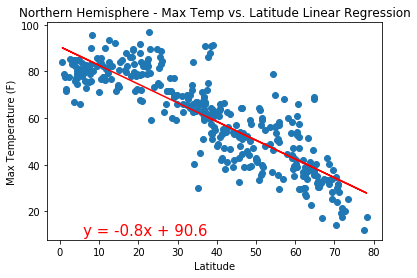

<Figure size 432x288 with 0 Axes>

In [110]:
x_val = northern_df["lat"]
y_val = northern_df["maxtemp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Linear Regression Equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The r-squared value displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()
plt.savefig("Northern Hem vs. Max Temp LinReg.png")

Linear Regression Equation: y = 0.73x + 82.41
The r-squared is: 0.783523085074932
The r-squared value displays a negative correlation.
In the southern hemisphere, as you move away from the equator the temperature decreases.


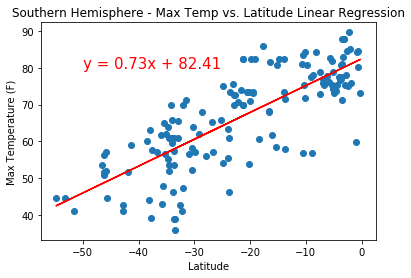

In [118]:
x_val = southern_df["lat"]
y_val = southern_df["maxtemp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Linear Regression Equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(-50, 80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The r-squared value displays a negative correlation.")
print("In the southern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()
plt.savefig("Southern Hem vs. Max Temp LinReg.png")

Linear Regression Equation: y = 0.08x + 64.34
The r-squared is: 0.06583041101525897
There is not much correlation in the data.


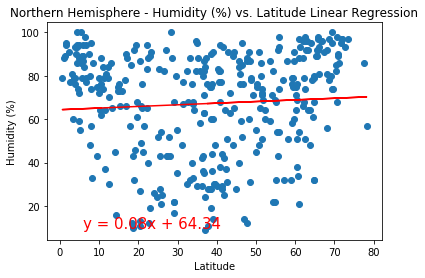

In [119]:
x_val = northern_df["lat"]
y_val = northern_df["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Linear Regression Equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("There is not much correlation in the data.")
plt.show()

Linear Regression Equation: y = 0.09x + 79.36
The r-squared is: 0.0853695620064282
There is not much correlation in the data.


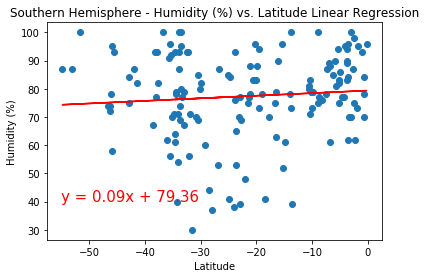

In [125]:
x_val = southern_df["lat"]
y_val = southern_df["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Linear Regression Equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("There is not much correlation in the data.")
plt.show()

Linear Regression Equation: y = 0.01x + 54.31
The r-squared is: 0.0031775684264684395
There is not much correlation in the data.


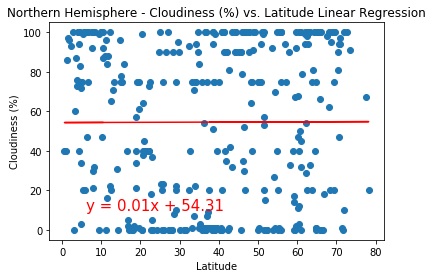

In [126]:
x_val = northern_df["lat"]
y_val = northern_df["cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Linear Regression Equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("There is not much correlation in the data.")
plt.show()

Linear Regression Equation: y = 0.42x + 47.85
The r-squared is: 0.16495219207844414
There is not much correlation in the data.


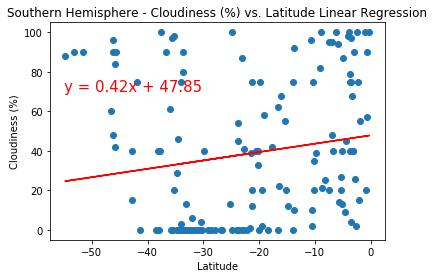

In [129]:
x_val = southern_df["lat"]
y_val = southern_df["cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Linear Regression Equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(-55,70),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("There is not much correlation in the data.")
plt.show()

Linear Regression Equation: y = 0.05x + 7.11
The r-squared is: 0.15939038707022377
There is not much correlation in the data.


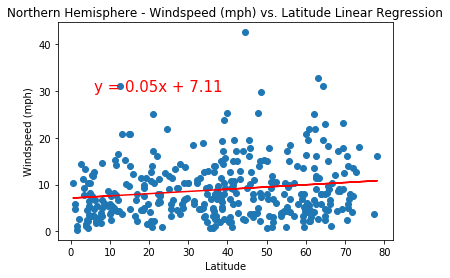

In [132]:
x_val = northern_df["lat"]
y_val = northern_df["windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Linear Regression Equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(6,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.title('Northern Hemisphere - Windspeed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("There is not much correlation in the data.")
plt.show()

Linear Regression Equation: y = 0.02x + 7.51
The r-squared is: 0.0646686845850686
There is not much correlation in the data.


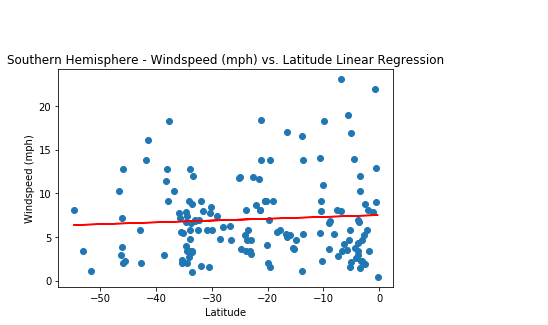

In [133]:
x_val = southern_df["lat"]
y_val = southern_df["windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Linear Regression Equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(-50,0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.title('Southern Hemisphere - Windspeed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("There is not much correlation in the data.")
plt.show()